## 00. Coding Best Practices

In [1]:
# Basic Libraries
import os
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Machine Learning
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Settings
warnings.filterwarnings('ignore') 
pd.set_option('display.max_columns', None)

In [2]:
# Basic functions
def data_info(): # improved data.info()
    print(f"The DataFrame shape is {data.shape}.")
    print()
    print("The DataFrame data types are:")
    print(data.dtypes.value_counts().tolist())
    print(data.dtypes.value_counts().index.tolist())
    print()
    print("DataFrame random row sample and full columns:")
    return data.sample(5)

def clean_columns(): # Standardizes the column name, returns the columns
    data_copy.columns = [i.lower().replace(' ', '_') for i in data_copy.columns]
    return data_copy.sample(0)
       
# Specific functions for this dataset
def convert_value(value): # function to convert value to unified format
    try:
        if isinstance(value, float):
            return value
        elif value.endswith('K'):
            return float(value[1:-1]) * 1000
        elif value.endswith('M'):
            return float(value[1:-1]) * 1000000
        else:
            return float(value)
    except ValueError:
        return None

## 01 - Getting the Data

In [3]:
file_path = os.path.join("C:/Users/apisi/01. IronData/01. GitHub/01. iron-activity/project-mbappe", "fifa21_male2.csv")
data = pd.read_csv(file_path)
data_info()

The DataFrame shape is (17125, 107).

The DataFrame data types are:
[52, 45, 10]
[dtype('O'), dtype('int64'), dtype('float64')]

DataFrame random row sample and full columns:


,ID,Name,Age,OVA,Nationality,Club,BOV,BP,Position,Player Photo,Club Logo,Flag Photo,POT,Team & Contract,Height,Weight,foot,Growth,Joined,Loan Date End,Value,Wage,Release Clause,Contract,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,Gender
6065,214411,N. Maturana,26,67,Chile,Colo-Colo,67,RW,RW RM,https://cdn.sofifa.com/players/214/411/20_120.png,https://cdn.sofifa.com/teams/110980/light_60.png,https://cdn.sofifa.com/flags/cl.png,67,Colo-Colo 2017 ~ 2020,"5'4""",139lbs,Left,0,"Jun 20, 2017",NaN,€825K,€3K,€1.2M,2017 ~ 2020,277,64,59,47,66,41.0,325,67,64.0,59,65,70,372,76,74,72.0,58,92.0,306,65,57.0,61,56,67,266,54,39.0,65.0,68.0,40,49.0,139,37,54,48.0,52,14,11,12,8,7,1737,371,2 ★,3★,High,Low,1 ★,75,60,65,69,45,57,6,62+2,62+2,62+2,67+0,66+0,66+0,66+0,67+0,67+0,67+0,67+0,66+1,64+2,64+2,64+2,66+1,58+2,56+2,56+2,56+2,58+2,56+2,51+2,51+2,51+2,56+2,15+2,Male
12985,244279,B. Ekincier,21,56,Azerbaijan,VfL Bochum 1848,57,ST,LM RM CAM,https://cdn.sofifa.com/players/244/279/20_120.png,https://cdn.sofifa.com/teams/160/light_60.png,https://cdn.sofifa.com/flags/az.png,61,VfL Bochum 1848 2018 ~ 2022,"5'11""",159lbs,Right,5,"Jul 1, 2018",NaN,€120K,€2K,€201K,2018 ~ 2022,261,59,54,42,57,49.0,248,61,50.0,34,52,51,321,65,69,74.0,43,70.0,276,71,60.0,38,55,52,227,42,25.0,51.0,51.0,58,45.0,120,42,39,39.0,48,11,12,8,5,12,1501,322,5 ★,2★,High,Medium,1 ★,67,57,54,59,37,48,4,55+2,55+2,55+2,56+0,55+0,55+0,55+0,56+0,55+2,55+2,55+2,55+2,50+2,50+2,50+2,55+2,47+2,44+2,44+2,44+2,47+2,45+2,43+2,43+2,43+2,45+2,14+2,Male
12286,242267,J. Campuzano,24,75,Colombia,Boca Juniors,76,CDM,CDM CM,https://cdn.sofifa.com/players/242/267/20_120.png,https://cdn.sofifa.com/teams/1877/light_60.png,https://cdn.sofifa.com/flags/co.png,83,Boca Juniors 2019 ~ 2023,"5'9""",165lbs,Right,8,"Jan 21, 2019",NaN,€9M,€13K,€14.4M,2019 ~ 2023,242,36,32,55,77,42.0,281,59,38.0,42,75,67,371,80,72,72.0,74,73.0,334,56,73.0,91,65,49,295,74,75.0,39.0,71.0,36,68.0,220,70,76,74.0,49,15,8,15,5,6,1792,391,3 ★,2★,Low,High,1 ★,76,41,64,64,72,74,79,55+2,55+2,55+2,59+0,60+0,60+0,60+0,59+0,64+2,64+2,64+2,63+2,69+2,69+2,69+2,63+2,70+2,74+2,74+2,74+2,70+2,71+2,71+2,71+2,71+2,71+2,16+2,Male
13128,244661,Vitinho,20,64,Brazil,KSV Cercle Brugge,65,RWB,RB,https://cdn.sofifa.com/players/244/661/20_120.png,https://cdn.sofifa.com/teams/1750/light_60.png,https://cdn.sofifa.com/flags/br.png,75,KSV Cercle Brugge 2018 ~ 2023,"5'9""",161lbs,Right,11,"Jul 13, 2018",NaN,€700K,€2K,€1.2M,2018 ~ 2023,213,60,23,42,63,25.0,279,71,49.0,41,50,68,356,75,69,78.0,59,75.0,267,38,76.0,60,62,31,279,65,57.0,57.0,62.0,38,58.0,186,59,64,63.0,49,11,9,12,9,8,1629,352,3 ★,3★,High,Medium,1 ★,72,30,58,70,59,63,19,50+2,50+2,50+2,60+0,57+0,57+0,57+0,60+0,60+2,60+2,60+2,62+2,59+2,59+2,59+2,62+2,63+2,61+2,61+2,61+2,63+2,62+2,60+2,60+2,60+2,62+2,15+2,Male
16804,258303,M. Sitek,19,58,Poland,Podbeskidzie Bielsko-Biała,59,RM,RM,https://cdn.sofifa.com/players/258/303/20_120.png,https://cdn.sofifa.com/teams/111087/light_60.png,https://cdn.sofifa.com/flags/pl.png,73,Podbeskidzie Bielsko-Biała 2020 ~ 2023,"5'9""",146lbs,Right,15,"Aug 16, 2020",NaN,€275K,€550,€543K,2020 ~ 2023,253,62,45,35,59,52.0,257,57,54.0,42,44,60,329,77,72,62.0,40,78.0,234,55,42.0,55,41,41,214,34,21.0,52.0,55.0,52,48.0,69,19,27,23.0,52,12,13,11,8,8,1408,302,2 ★,2★,Medium,Low,1 ★,74,47,55,59,24,43,5,51+2,51+2,51+2,57+0,55+0,55+0,55+0,57+0,55+2,55+2,55+2,57+2,50+2,50+2,50+2,57+2,45+2,39+2,39+2,39+2,45+2,42+2,32+2,32+2,32+2,42+2,14+2,Male


_____________
The following dataset is a collection of **one-year** 17.125 player information distributed among 107 different columns. The majority of our data types are mostly **numericals** (52 object / 45 integers / 10 floats).

Our **project goal** is to identify players who have the potential to become **the next Mbappé**. After reading the [documentation](https://www.kaggle.com/datasets/ekrembayar/fifa-21-complete-player-dataset?select=fifa21_male2.csv) we decide to proceed with the following **strategy**:

1. The **target** of our dataset will be `OVA` (overall score), which is a summary of a player's performance and potential. 
1. The majority of the data types are **numericals**, so we will work with that.
3. Through **Exploratory Data Analysis** we will identify the features that contribute to this prediction.
_____________
In previous versions, we removed some numerical features realted to player-potential. For this one, we will keep all features related to player attributes.

Also in previous versions, we converted features like `Value` and `Release_clause`; we will not use them this time, since we don't want to predict the player market value.

Lastly, features such as `'height'`, `'weight'`, etc., will be converted to the metric system by removing quotation symbols or lbs.
_____________

## 02 - Cleaning the Data

In [4]:
data_copy = data.copy() # as best practices, we do first a copy of our dataframe

In [5]:
clean_columns() # Standardizes the column name from data_copy

,id,name,age,ova,nationality,club,bov,bp,position,player_photo,club_logo,flag_photo,pot,team_&_contract,height,weight,foot,growth,joined,loan_date_end,value,wage,release_clause,contract,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,w/f,sm,a/w,d/w,ir,pac,sho,pas,dri,def,phy,hits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,gender


### Encoding
* To easily **clean** it, we will split the dataset to get all numericals.
* Firstly, we need to encode some columns considered as **categoricals** that are actually **numericals**
* e.g: `height`, `weight`, etc.

In [6]:
# Convert height data from feet and inches to centimeters
data_copy['h_cm'] = data_copy['height'].apply(lambda x: int(x.split("'")[0])*30.48 + int(x.split("'")[1].replace('"', ''))*2.54)
# Convert weight data from pounds to kilograms
data_copy['w_kg'] = data_copy['weight'].apply(lambda x: int(x[:-3]) / 2.2046)
# Modify cells with 'K' character, leave others unchanged, turn it to integer
data_copy['hits'] = data_copy['hits'].apply(lambda x: float(x.replace('K','')) * 1000 if isinstance(x, str) and 'K' in x else x).astype(int)

# Applying lambda to:

# weak_foot 
data_copy['w_f'] = data_copy['w/f'].apply(lambda x: int(x[0]))
# skilled_moves
data_copy['sm'] = data_copy['sm'].apply(lambda x: int(x[0]) if isinstance(x, str) else x)

# international_reputation
data_copy['ir'] = data_copy['ir'].apply(lambda x: int(x[0]) if isinstance(x, str) else x)

# Visualizing the changes
data_encoded = data_copy[['h_cm', 'w_kg', 'hits', 'w_f', 'sm', 'ir']]
data_encoded.head(5)

,h_cm,w_kg,hits,w_f,sm,ir
0,182.88,82.101061,4,3,2,2
1,177.80,64.864374,4,4,3,1
2,175.26,73.029121,11,4,4,2
3,180.34,74.843509,3,3,1,1
4,170.18,68.039554,149,4,4,4


### Further Encoding

* `a/w` stands for Attacking Work Rate
* `d/w` stands for Defensive Work Rate

**AKA.** Tendency to a player towards attack or defense.

In [7]:
data_f_encoding = data_copy[['a/w', 'd/w']]
data_f_encoding.head(5)

,a/w,d/w
0,Medium,High
1,Medium,Medium
2,Medium,Low
3,NaN,NaN
4,High,Medium


In [8]:
# Initialize the LabelEncoder object from sklearn
le = LabelEncoder()

# Fit and transform the data frame column
data_copy['a_wr'] = le.fit_transform(data_copy['a/w'])
data_copy['d_wr'] = le.fit_transform(data_copy['d/w'])

# Visualizing the changes
data_encoded_f = data_copy[['a_wr', 'd_wr']]
data_comparision_2 = pd.concat([data_f_encoding, data_encoded_f], axis=1)
data_comparision_2.head(5)

,a/w,d/w,a_wr,d_wr
0,Medium,High,2,0
1,Medium,Medium,2,2
2,Medium,Low,2,1
3,NaN,NaN,3,3
4,High,Medium,0,2


### Selecting numericals / Dealing with Null values

In [9]:
# Create a new dataframe with only the numerical columns using select_dtypes
X_N = data_copy.select_dtypes(np.number).fillna(0) # we also deal with NaN values
X_N.head(10)

,id,age,ova,bov,pot,growth,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,sm,ir,pac,sho,pas,dri,def,phy,hits,h_cm,w_kg,w_f,a_wr,d_wr
0,2,33,69,71,69,0,313,75,50,59,71,58.0,338,73,65.0,60,69,71,347,68,74,68.0,69,68.0,347,74,68.0,69,68,68,320,72,69.0,63.0,66.0,50,0.0,208,70,69,69.0,56,14,5,15,10,12,1929,408,2,2,71,59,70,71,68,69,4,182.88,82.101061,3,2,0
1,16,37,71,70,71,0,337,68,64,61,76,68.0,369,69,79.0,79,71,71,305,56,50,62.0,65,72.0,324,75,54.0,64,60,71,362,71,71.0,72.0,73.0,75,79.0,153,70,43,40.0,56,9,12,13,11,11,1906,385,3,1,53,69,73,69,58,63,4,177.80,64.864374,4,2,2
2,27,33,71,71,71,0,337,80,64,41,77,75.0,387,79,84.0,77,69,78,295,48,42,71.0,59,75.0,284,72,58.0,29,56,69,317,69,39.0,69.0,74.0,66,0.0,99,35,34,30.0,51,9,6,13,16,7,1770,354,4,2,45,68,76,77,36,52,11,175.26,73.029121,4,2,1
3,36,36,68,70,82,14,264,54,70,60,80,0.0,255,68,0.0,46,64,77,176,59,62,0.0,55,0.0,239,63,0.0,51,66,59,271,59,70.0,72.0,0.0,70,0.0,75,34,41,0.0,68,5,21,64,21,21,1348,369,1,1,61,66,66,69,47,60,3,180.34,74.843509,3,3,3
4,41,36,81,82,81,0,367,75,69,54,90,79.0,408,85,80.0,70,83,90,346,61,56,79.0,75,75.0,297,67,40.0,58,62,70,370,58,70.0,78.0,93.0,71,89.0,181,68,57,56.0,45,6,13,6,13,7,2014,420,4,4,58,70,85,85,63,59,149,170.18,68.039554,4,0,2
5,61,27,66,66,70,4,271,61,53,42,58,57.0,276,67,61.0,42,44,62,406,90,91,75.0,65,85.0,315,71,70.0,64,61,49,256,63,26.0,63.0,58.0,46,0.0,79,22,26,31.0,46,8,13,7,9,9,1649,360,3,2,91,56,56,67,27,63,7,172.72,73.936315,2,2,2
6,80,38,77,77,77,0,342,80,66,43,84,69.0,406,77,83.0,80,85,81,308,54,36,67.0,70,81.0,340,77,72.0,51,64,76,384,87,62.0,65.0,85.0,85,80.0,190,65,65,60.0,47,7,11,7,14,8,2017,403,4,2,44,71,83,77,62,66,7,170.18,72.121927,4,2,2
7,241,39,78,78,78,0,380,90,70,60,85,75.0,402,77,87.0,78,81,79,337,59,60,72.0,76,70.0,310,71,59.0,48,61,71,358,60,47.0,78.0,83.0,90,0.0,120,26,43,51.0,32,10,5,7,5,5,1939,392,3,3,60,72,85,77,41,57,9,177.80,71.214733,2,2,2
8,244,35,76,78,82,6,304,72,31,75,71,55.0,258,44,56.0,33,61,64,324,64,70,51.0,72,67.0,284,47,70.0,65,74,28,319,87,85.0,45.0,70.0,32,0.0,242,78,81,83.0,43,12,9,5,6,11,1774,378,2,3,67,36,67,53,81,74,4,177.80,78.925882,3,3,3
9,246,37,80,82,80,0,394,83,65,72,89,85.0,393,75,74.0,67,90,87,338,53,53,68.0,82,82.0,333,88,64.0,34,63,84,417,87,79.0,83.0,91.0,77,0.0,143,58,49,36.0,47,7,12,5,15,8,2065,415,3,2,53,76,87,79,59,61,7,170.18,71.214733,3,2,2


### Dropping unnecesary features

From all features above, we will drop the following:
* `id` it's just the player identifier.
* `bov` after many attempts and previous versions, it always show high multicollinearity with `ova`, so we will drop it now.
* `base_stats` and `total_stats` are the sum of different stats.

In [10]:
X_N = X_N.drop(columns=['id', 'bov', 'base_stats', 'total_stats'])

In [11]:
# Now, we will get a list of all column names to just quickly move the target at the end
data_headers = list(X_N.columns.values) # to get and check all column names
print("The Column Headers are :", data_headers) 

The Column Headers are : ['age', 'ova', 'pot', 'growth', 'attacking', 'crossing', 'finishing', 'heading_accuracy', 'short_passing', 'volleys', 'skill', 'dribbling', 'curve', 'fk_accuracy', 'long_passing', 'ball_control', 'movement', 'acceleration', 'sprint_speed', 'agility', 'reactions', 'balance', 'power', 'shot_power', 'jumping', 'stamina', 'strength', 'long_shots', 'mentality', 'aggression', 'interceptions', 'positioning', 'vision', 'penalties', 'composure', 'defending', 'marking', 'standing_tackle', 'sliding_tackle', 'goalkeeping', 'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning', 'gk_reflexes', 'sm', 'ir', 'pac', 'sho', 'pas', 'dri', 'def', 'phy', 'hits', 'h_cm', 'w_kg', 'w_f', 'a_wr', 'd_wr']


In [12]:
# We simply move our target overall_scores to the right, for readibility and remove ID
X_N = X_N[['age', 'pot', 'growth', 'attacking', 'crossing', 'finishing', 'heading_accuracy', 'short_passing', 'volleys', 'skill', 
            'dribbling', 'curve', 'fk_accuracy', 'long_passing', 'ball_control', 'movement', 'acceleration', 'sprint_speed', 'agility', 
            'reactions', 'balance', 'power', 'shot_power', 'jumping', 'stamina', 'strength', 'long_shots', 'mentality', 'aggression', 
            'interceptions', 'positioning', 'vision', 'penalties', 'composure', 'defending', 'marking', 'standing_tackle', 'sliding_tackle',
            'goalkeeping', 'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning', 'gk_reflexes', 'sm', 'ir', 'pac', 'sho', 'pas', 
            'dri', 'def', 'phy', 'hits', 'h_cm', 'w_kg', 'w_f', 'a_wr', 'd_wr', 'ova']]
X_N.shape

(17125, 59)

**Up2date**: After having an impossible heatmap with 59 features, we decide to reduce the number of features:
* Reduced features related to **goalkeepers**: `goalkeeping`, `gk_diving`, `gk_handling`, `gk_kicking`, `gk_positioning`, and `gk_reflexes`
* Also, as in previous version, we will drop columns that are already summarized in other features:
    * Attacking = crossing, finishing, heading_accuracy, short_passing, volleys
    * Skill = dribbling, curve, fk_accuracy, long_passing, ball_control
    * Movement = acceleration, sprint_speed, agility, reactions, balance
    * Power = shot_power, jumping, stamina, strength, long_shots
    * Mentality = aggression, interceptions, positioning, vision, penalties, composure
    * Defending = marking, standing_tackle, sliding_tackle

In [13]:
# We simply move our target overall_scores to the right, for readibility and remove ID
X_N = X_N[['age', 'pot', 'growth', 'attacking', 'skill', 'movement', 'power', 'mentality', 'defending', 'sliding_tackle',
            'sm', 'ir', 'pac', 'sho', 'pas', 'dri', 'def', 'phy', 'hits', 'h_cm', 'w_kg', 'w_f', 'a_wr', 'd_wr', 'ova']]
X_N.shape

(17125, 25)

**Now**, we have a cleaned dataset with `17.125` numerical player information in `25` distinct numerical features.

In [14]:
X_N.sample(5)

,age,pot,growth,attacking,skill,movement,power,mentality,defending,sliding_tackle,sm,ir,pac,sho,pas,dri,def,phy,hits,h_cm,w_kg,w_f,a_wr,d_wr,ova
4606,27,68,0,263,302,357,370,326,188,62.0,3,1,77,52,59,72,64,81,4,182.88,76.204300,4,0,2,68
14851,19,81,14,258,273,313,287,276,193,62.0,2,1,68,41,60,64,65,66,81,185.42,72.121927,3,2,2,67
8748,22,79,11,252,277,336,302,311,187,60.0,2,1,64,45,59,64,63,77,4,170.18,66.225166,2,2,2,68
7392,21,68,6,264,296,346,222,202,99,22.0,4,1,66,50,56,72,34,34,5,172.72,71.214733,3,2,1,62
2385,28,83,0,363,432,411,351,342,156,47.0,5,4,72,79,82,89,52,59,647,172.72,68.039554,4,2,2,83


## 03 - Exploratory Data Analysis

In [15]:
# Looking at promising talents
data_copy['pot_minus_ova'] = data_copy['pot'] - data_copy['ova'] 

# Create a new DataFrame that contains only the rows with "difference" > 10 and age < 21
talents = data_copy[(data_copy['pot_minus_ova'] > 10) & (data_copy['age'] < 21)]
talents_sorted = talents.sort_values('pot_minus_ova', ascending=False)
talents_sorted.head(3)

,id,name,age,ova,nationality,club,bov,bp,position,player_photo,club_logo,flag_photo,pot,team_&_contract,height,weight,foot,growth,joined,loan_date_end,value,wage,release_clause,contract,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,w/f,sm,a/w,d/w,ir,pac,sho,pas,dri,def,phy,hits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,gender,h_cm,w_kg,w_f,a_wr,d_wr,pot_minus_ova
16660,257793,R. Richards,16,54,England,West Bromwich Albion,55,LM,LM CAM,https://cdn.sofifa.com/players/257/793/20_120.png,https://cdn.sofifa.com/teams/109/light_60.png,https://cdn.sofifa.com/flags/gb-eng.png,80,West Bromwich Albion 2020 ~ 2023,"5'10""",150lbs,Left,26,"Aug 4, 2020",NaN,€150K,€1K,€450K,2020 ~ 2023,220,52,40,37,50,41.0,248,59,47.0,41,43,58,313,72,64,62.0,43,72.0,251,53,51.0,54,45,48,194,33,16.0,39.0,55.0,51,48.0,84,22,29,33.0,43,10,8,8,8,9,1353,293,3 ★,2,Medium,Medium,1,68,45,50,59,26,45,83,48+2,48+2,48+2,53+0,51+0,51+0,51+0,53+0,52+2,52+2,52+2,53+2,47+2,47+2,47+2,53+2,43+2,38+2,38+2,38+2,43+2,41+2,34+2,34+2,34+2,41+2,12+2,Male,177.80,68.039554,3,2,2,26
17112,259074,A. Hajdari,17,53,Switzerland,FC Basel 1893,55,CB,CB,https://cdn.sofifa.com/players/259/074/20_120.png,https://cdn.sofifa.com/teams/896/light_60.png,https://cdn.sofifa.com/flags/ch.png,79,FC Basel 1893 2020 ~ 2024,"6'2""",176lbs,Left,26,"Sep 14, 2020",NaN,€120K,€500,€300K,2020 ~ 2024,161,31,17,53,32,28.0,134,22,30.0,29,25,28,262,58,61,45.0,48,50.0,252,38,66.0,56,68,24,195,51,53.0,28.0,27.0,36,39.0,157,47,58,52.0,46,12,9,9,11,5,1207,259,3 ★,2,Low,Medium,1,60,25,30,29,53,62,37,36+2,36+2,36+2,32+0,32+0,32+0,32+0,32+0,31+2,31+2,31+2,34+2,33+2,33+2,33+2,34+2,45+2,44+2,44+2,44+2,45+2,48+2,53+2,53+2,53+2,48+2,14+2,Male,187.96,79.833076,3,1,2,26
16812,258315,B. Arrey-Mbi,17,60,Germany,Bayern München II,62,CB,CB LB,https://cdn.sofifa.com/players/258/315/20_120.png,https://cdn.sofifa.com/teams/110679/light_60.png,https://cdn.sofifa.com/flags/de.png,86,Bayern München II 2020 ~ 2022,"6'2""",168lbs,Left,26,"Jul 1, 2020",NaN,€425K,€500,€1M,2020 ~ 2022,204,34,25,59,56,30.0,207,49,31.0,29,44,54,324,66,70,68.0,52,68.0,273,38,78.0,62,71,24,228,63,53.0,35.0,44.0,33,56.0,180,55,64,61.0,50,13,9,8,12,8,1466,322,3 ★,2,Medium,Medium,1,68,29,45,54,58,68,720,46+2,46+2,46+2,47+0,46+0,46+0,46+0,47+0,48+2,48+2,48+2,49+2,49+2,49+2,49+2,49+2,55+2,56+2,56+2,56+2,55+2,57+2,60+2,60+2,60+2,57+2,15+2,Male,187.96,76.204300,3,2,2,26


In [16]:
# Looking at Overall Score Plaer with rating >80
mvps = data_copy[(data_copy['ova'] > 80)]

# Sort the MVPs
mvps_sorted = mvps.sort_values('ova', ascending=False)
mvps_sorted.head(5)

,id,name,age,ova,nationality,club,bov,bp,position,player_photo,club_logo,flag_photo,pot,team_&_contract,height,weight,foot,growth,joined,loan_date_end,value,wage,release_clause,contract,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,w/f,sm,a/w,d/w,ir,pac,sho,pas,dri,def,phy,hits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,gender,h_cm,w_kg,w_f,a_wr,d_wr,pot_minus_ova
752,158023,L. Messi,33,93,Argentina,FC Barcelona,93,RW,RW ST CF,https://cdn.sofifa.com/players/158/023/20_120.png,https://cdn.sofifa.com/teams/241/light_60.png,https://cdn.sofifa.com/flags/ar.png,93,FC Barcelona 2004 ~ 2021,"5'7""",159lbs,Left,0,"Jul 1, 2004",NaN,€67.5M,€560K,€138.4M,2004 ~ 2021,429,85,95,70,91,88.0,470,96,93.0,94,91,96,451,91,80,91.0,94,95.0,389,86,68.0,72,69,94,347,44,40.0,93.0,95.0,75,96.0,91,32,35,24.0,54,6,11,15,14,8,2231,466,4 ★,4,Medium,Low,5,85,92,91,95,38,65,830,89+3,89+3,89+3,92+0,93+0,93+0,93+0,92+0,93+0,93+0,93+0,91+2,87+3,87+3,87+3,91+2,66+3,65+3,65+3,65+3,66+3,62+3,52+3,52+3,52+3,62+3,19+3,Male,170.18,72.121927,4,2,1,0
142,20801,Cristiano Ronaldo,35,92,Portugal,Juventus,92,ST,ST LW,https://cdn.sofifa.com/players/020/801/20_120.png,https://cdn.sofifa.com/teams/45/light_60.png,https://cdn.sofifa.com/flags/pt.png,92,Juventus 2018 ~ 2022,"6'2""",183lbs,Right,0,"Jul 10, 2018",NaN,€46M,€220K,€75.9M,2018 ~ 2022,437,84,95,90,82,86.0,414,88,81.0,76,77,92,431,87,91,87.0,95,71.0,444,94,95.0,84,78,93,353,63,29.0,95.0,82.0,84,95.0,84,28,32,24.0,58,7,11,15,14,11,2221,464,4 ★,5,High,Low,5,89,93,81,89,35,77,750,91+1,91+1,91+1,89+0,91+0,91+0,91+0,89+0,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,54+3,54+3,54+3,61+3,20+3,Male,187.96,83.008255,4,0,1,0
2287,188545,R. Lewandowski,31,91,Poland,FC Bayern München,91,ST,ST,https://cdn.sofifa.com/players/188/545/20_120.png,https://cdn.sofifa.com/teams/21/light_60.png,https://cdn.sofifa.com/flags/pl.png,91,FC Bayern München 2014 ~ 2023,"6'0""",176lbs,Right,0,"Jul 1, 2014",NaN,€80M,€240K,€132M,2014 ~ 2023,423,71,94,85,84,89.0,407,85,79.0,85,70,88,407,77,78,77.0,93,82.0,420,89,84.0,76,86,85,391,81,49.0,94.0,79.0,88,88.0,96,35,42,19.0,51,15,6,12,8,10,2195,457,4 ★,4,High,Medium,4,78,91,78,85,43,82,487,89+2,89+2,89+2,85+0,87+0,87+0,87+0,85+0,85+3,85+3,85+3,83+3,79+3,79+3,79+3,83+3,64+3,65+3,65+3,65+3,64+3,61+3,60+3,60+3,60+3,61+3,19+3,Male,182.88,79.833076,4,0,2,0
2650,190871,Neymar Jr,28,91,Brazil,Paris Saint-Germain,91,LW,LW CAM,https://cdn.sofifa.com/players/190/871/20_120.png,https://cdn.sofifa.com/teams/73/light_60.png,https://cdn.sofifa.com/flags/br.png,91,Paris Saint-Germain 2017 ~ 2022,"5'9""",150lbs,Right,0,"Aug 3, 2017",NaN,€90M,€270K,€166.5M,2017 ~ 2022,408,85,87,62,87,87.0,448,95,88.0,89,81,95,453,94,89,96.0,91,83.0,357,80,62.0,81,50,84,356,51,36.0,87.0,90.0,92,93.0,94,35,30,29.0,59,9,9,15,15,11,2175,451,5 ★,5,High,Medium,5,91,85,86,94,36,59,546,84+3,84+3,84+3,90+0,89+0,89+0,89+0,90+0,90+1,90+1,90+1,90+1,83+3,83+3,83+3,90+1,67+3,62+3,62+3,62+3,67+3,62+3,49+3,49+3,49+3,62+3,20+3,Male,175.26,68.039554,5,0,2,0
2871,192985,K. De Bruyne,29,91,Belgium,Manchester City,91,CAM,CAM CM,https://cdn.sofifa.com/players/192/985/20_120.png,https://cdn.sofifa.com/teams/10/light_60.png,https://cdn.sofifa.com/flags/be.png,91,Manchester City 2015 ~ 2023,"5'11""",154lbs,Right,0,"Aug 30, 2015",NaN,€87M,€370K,€161M,2015 ~ 2023,407,94,82,55,94,82.0,441,88,85.0,83,93,92,398,77,76,78.0,91,76.0,408,91,63.0,89,74,91,408,76,66.0,88.0,94.0,84,91.0,186,68,65,53.0,56,15,13,5,10,13,2304,485,5 ★,4,High,High,4,76,86,93,88,64,78,406,83+3,83+3,83+3,88+0,88+0,88+0

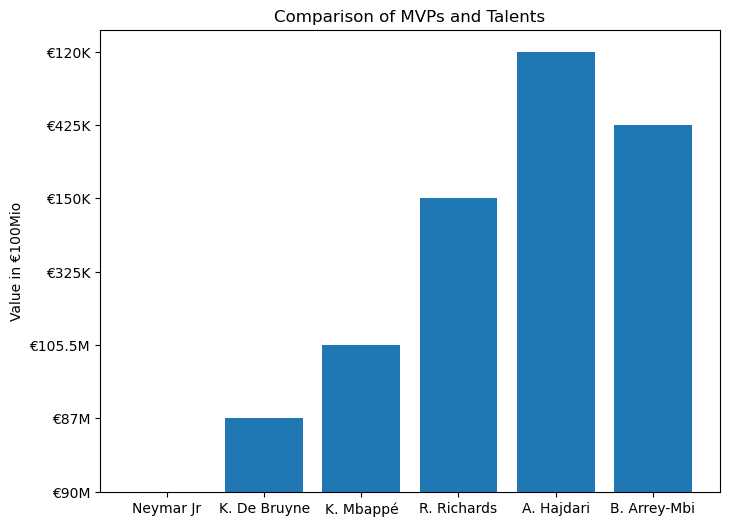

In [17]:
# create a dataframe with 'name' and 'value' columns
df = pd.DataFrame(data_copy, columns=['name', 'value'])

# select the rows for the six specific players you want to plot
players = ['K. Mbappé', 'Neymar Jr', 'K. De Bruyne', 'R. Richards', 'A. Hajdari','B. Arrey-Mbi']
df_players = df[df['name'].isin(players)]

# create a bar chart
plt.figure(figsize=(8,6))
bars = plt.bar(df_players['name'], df_players['value'])
plt.ylabel('Value in €100Mio')
plt.title('Comparison of MVPs and Talents')

# show the chart
plt.show()

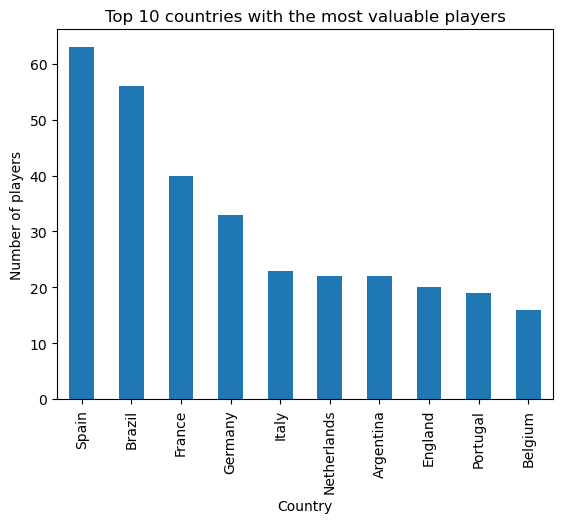

In [18]:
# Group the data by country and count the number of players in each country
mvps_by_country = mvps.groupby('nationality')['name'].count().sort_values(ascending=False)

# Plot a bar chart of the top 10 countries with the most players
mvps_by_country.head(10).plot(kind='bar')

# Add labels and a title to the chart
plt.xlabel('Country')
plt.ylabel('Number of players')
plt.title('Top 10 countries with the most valuable players')

# Display the chart
plt.show()

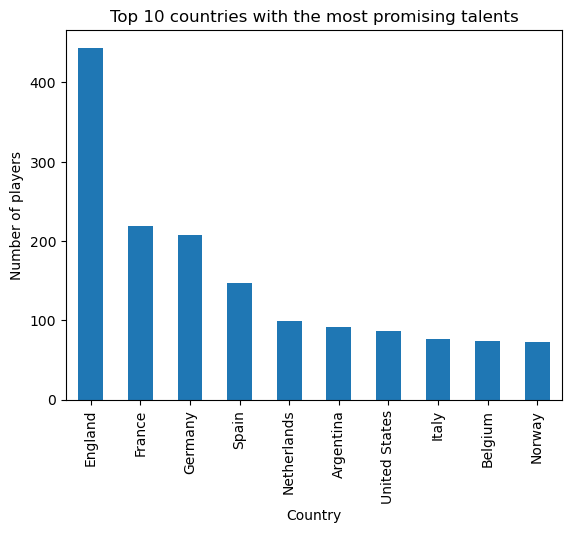

In [19]:
# Group the data by country and count the number of players in each country
talents_by_country = talents.groupby('nationality')['name'].count().sort_values(ascending=False)

# Plot a bar chart of the top 10 countries with the most players
talents_by_country.head(10).plot(kind='bar')

# Add labels and a title to the chart
plt.xlabel('Country')
plt.ylabel('Number of players')
plt.title('Top 10 countries with the most promising talents')

# Display the chart
plt.show()

## 04 - Processing Data

### Dealing with outliers

In [20]:
X_N.shape

(17125, 25)

In [21]:
for column in X_N:
    Q1 = X_N[column].quantile(0.25)
    Q3 = X_N[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    X_N = X_N[(X_N[column] >= lower_bound) & (X_N[column] <= upper_bound)]

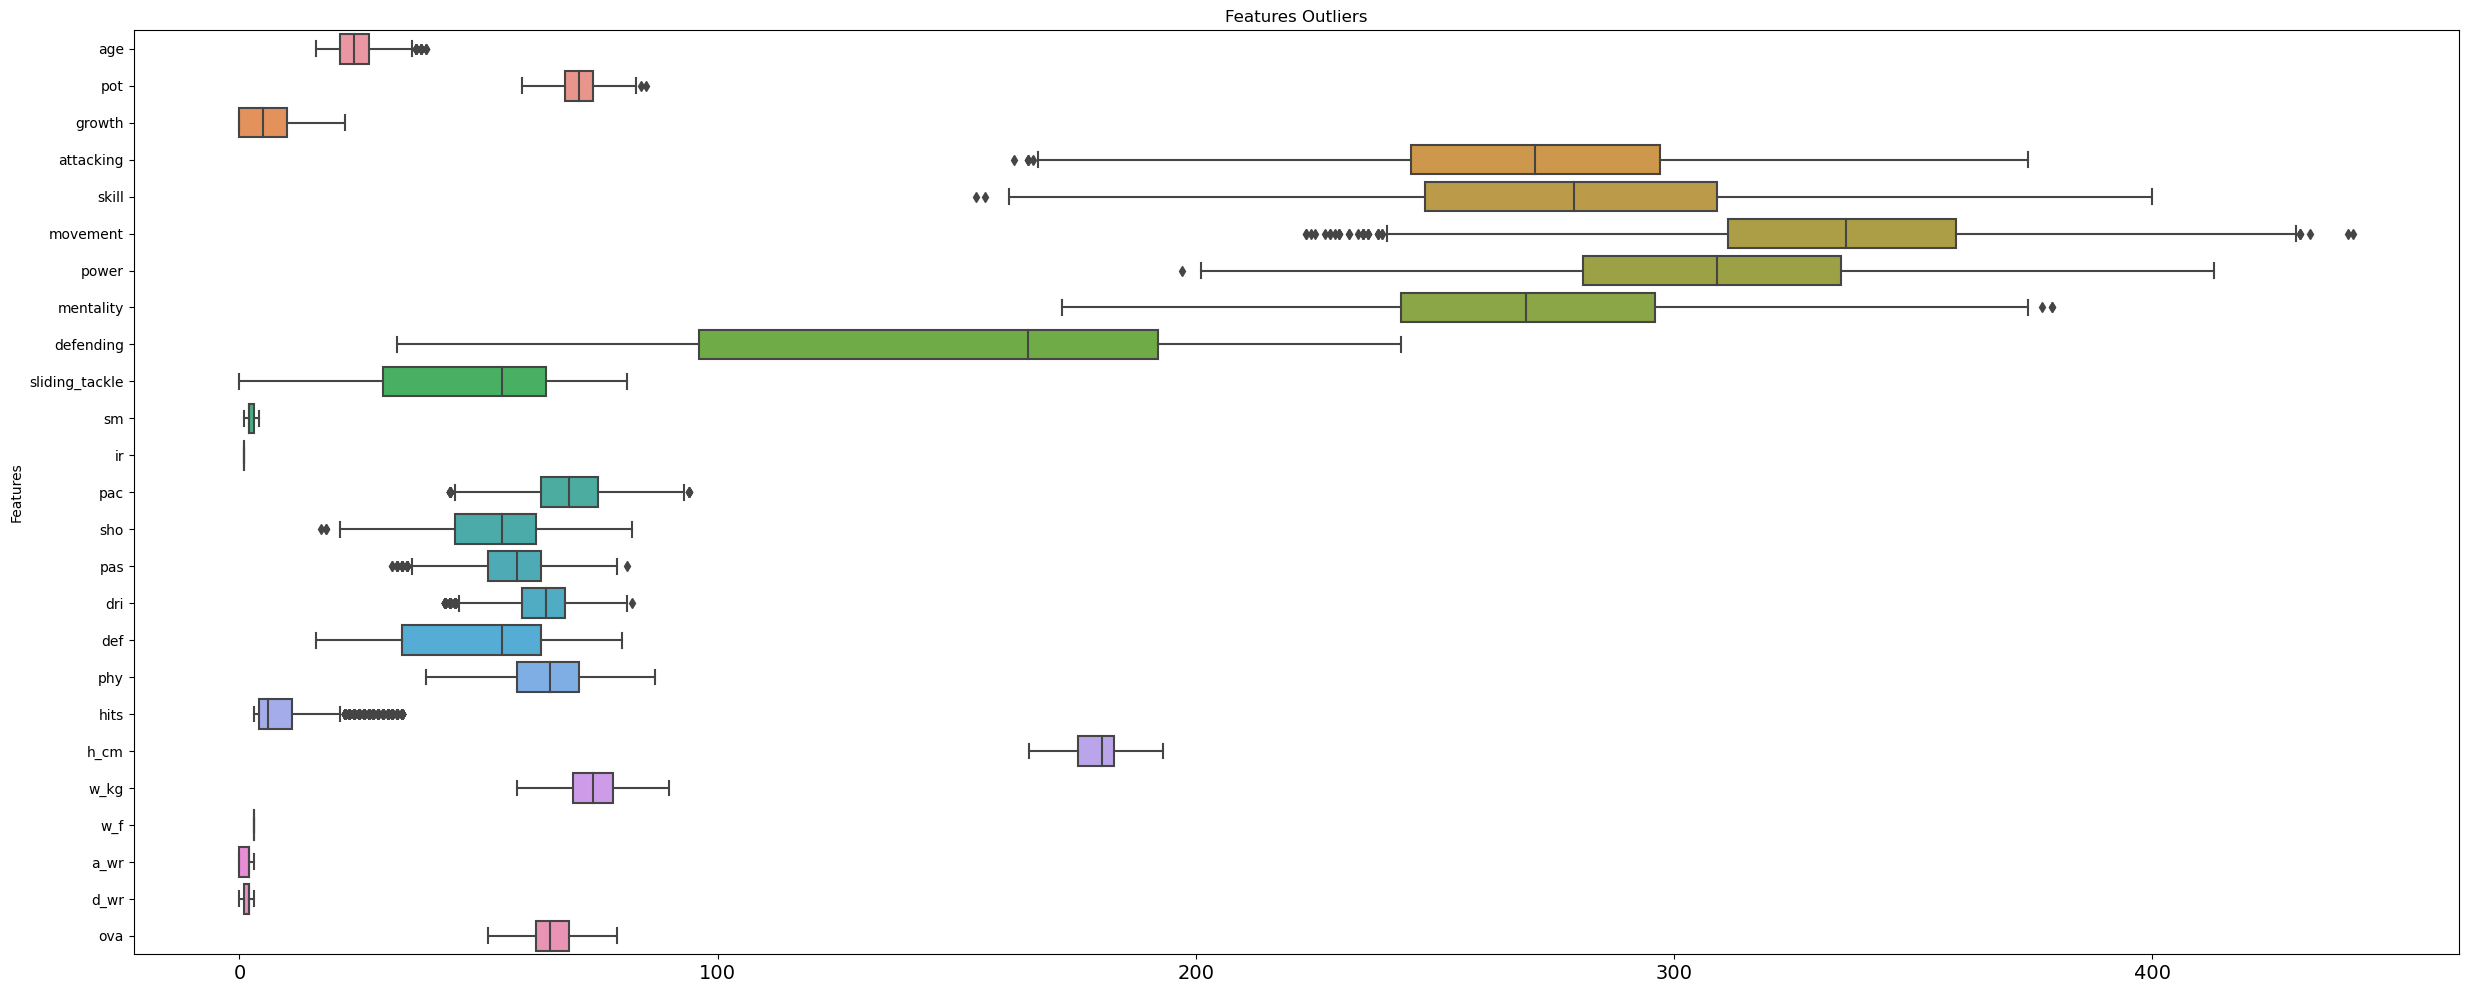

In [22]:
fig, ax = plt.subplots(figsize=(30, 12))
sns.boxplot(data=X_N, orient="h", ax=ax, showfliers=True, whis=1.5)

# Set the x-axis label
ax.set_ylabel("Features")
# Set the title of the plot
ax.set_title("Features Outliers")
# Adjust the font size of the x-axis ticks
ax.tick_params(axis='x', labelsize=14)
# Show the plot
plt.show()

### Checking normal distributions

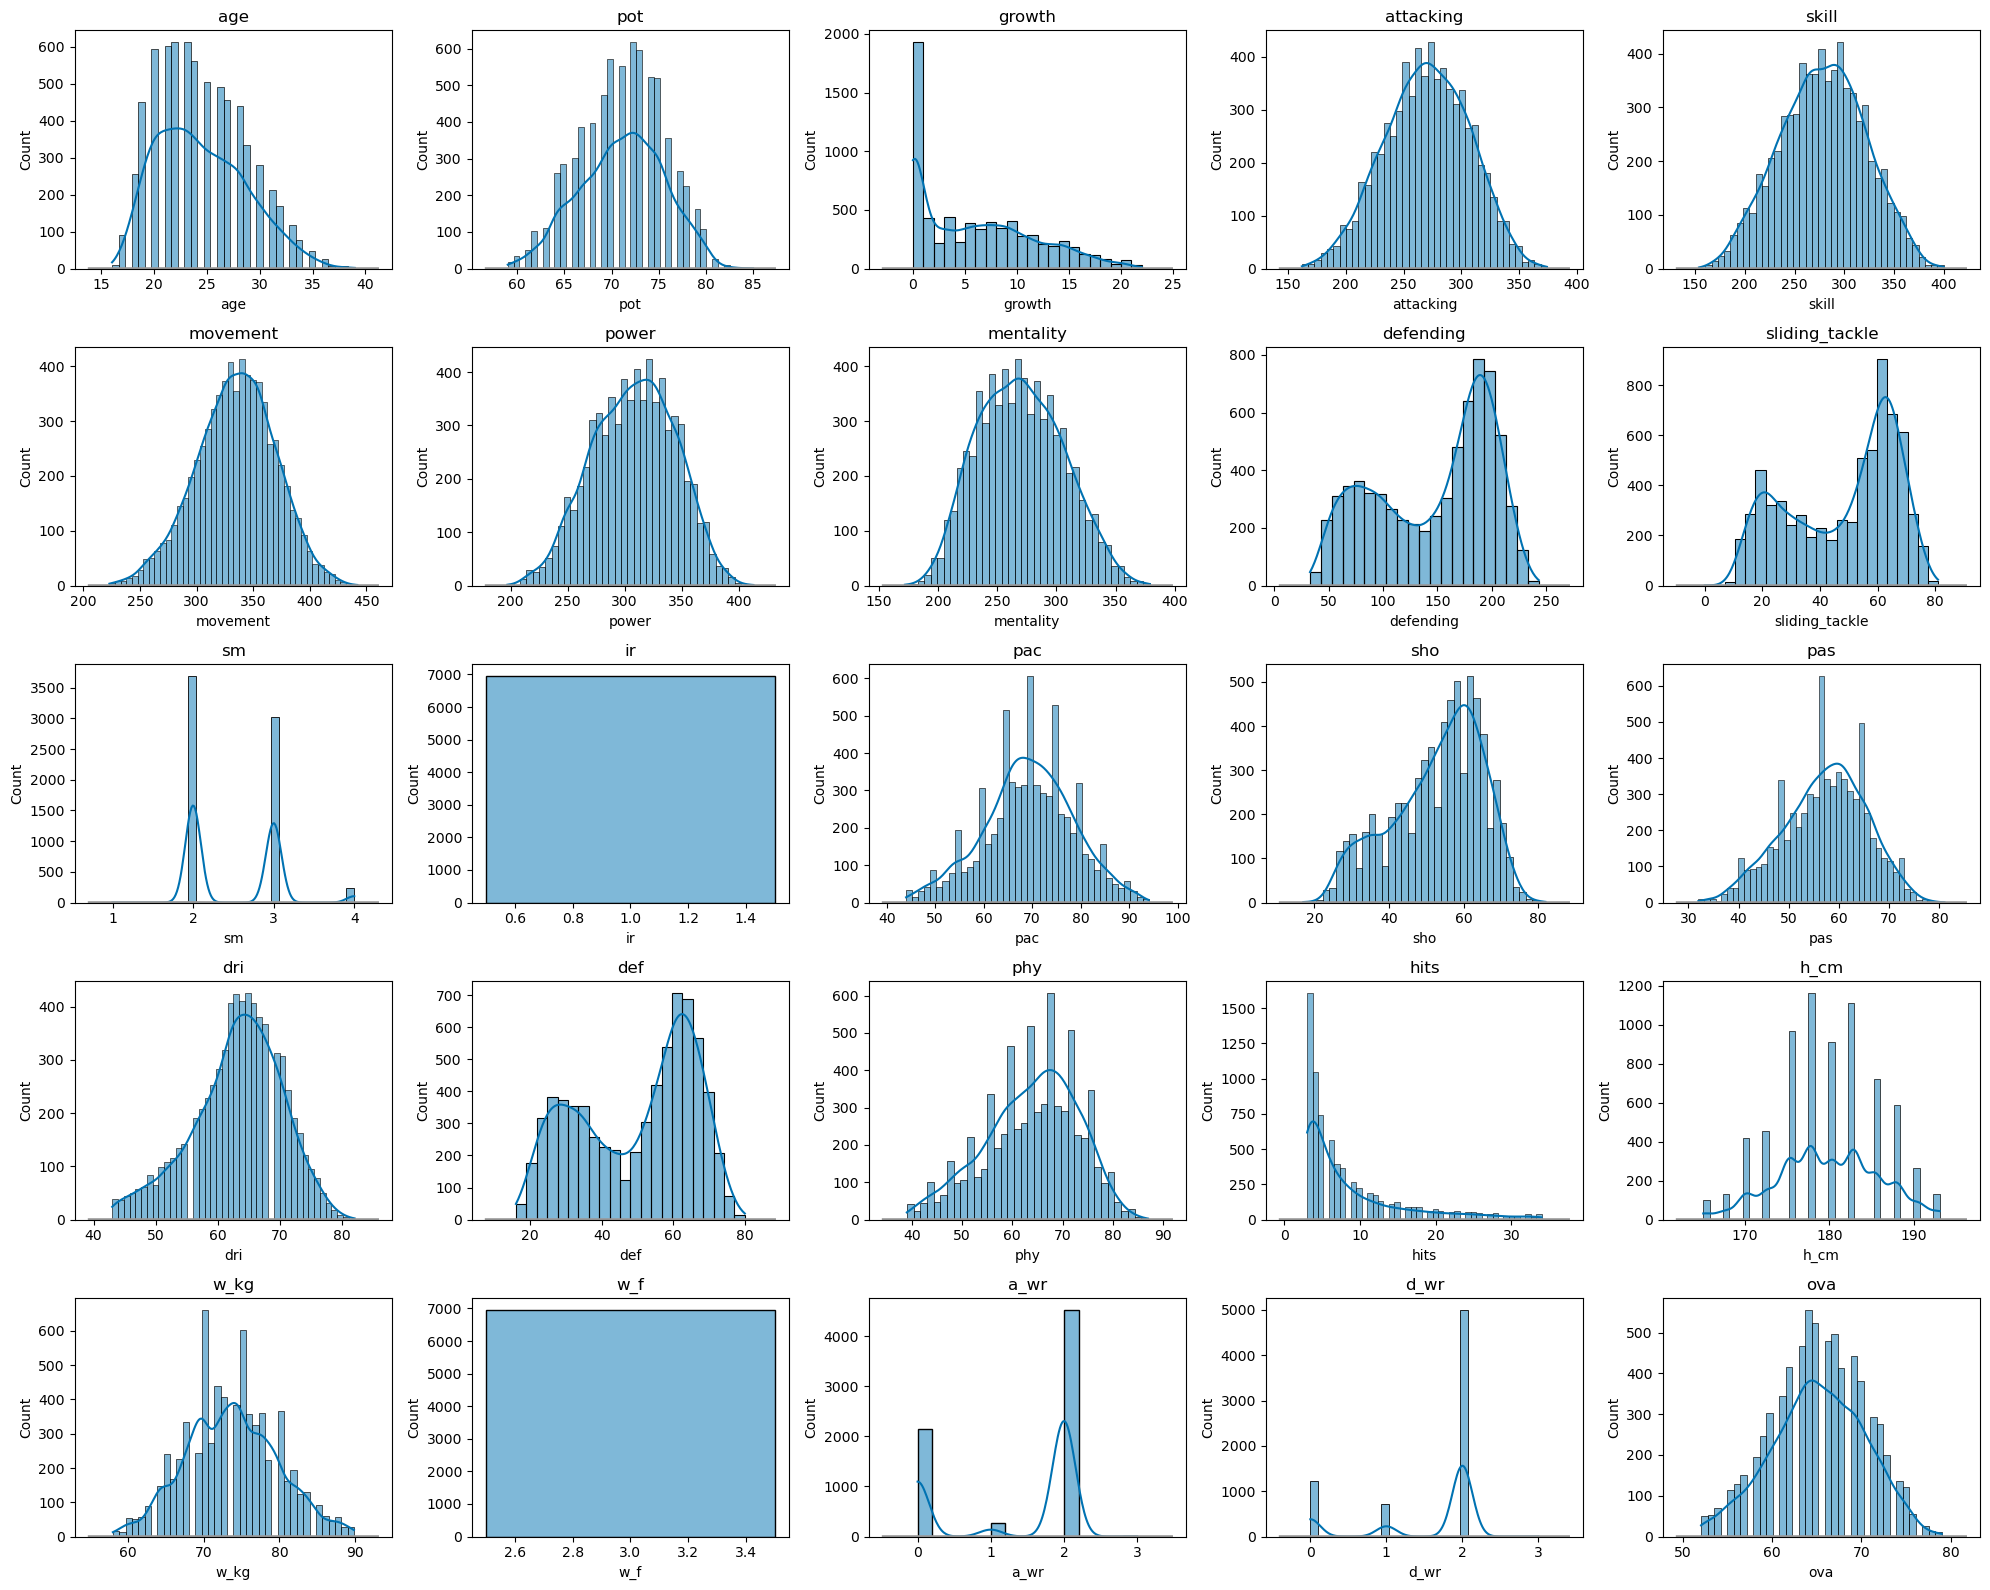

In [23]:
# set color palette
colors = ['#0072B2'] # blue

# plot normalized features in a grid
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(20, 16)) # nrows to 5, ncols to 6 to plot our 26 features
for i, ax in enumerate(axes.flat):
    if i >= len(X_N.columns):
        break
    sns.histplot(X_N.iloc[:, i], ax=ax, color=colors[i % len(colors)], kde=True)
    sns.kdeplot(X_N.iloc[:, i], ax=ax, color='#999999', linewidth=2)
    ax.set_title(X_N.columns[i])
plt.tight_layout()
plt.show()

The majority of our features seems to have a bell-shape curve, so we can use **MinMaxScaler** for normalization.

Lastly, We will drop `ir` and `w_f` which provides with information about international reputation and their weak_foot, since can effect the correlation matrix (we tried... they appear as empty spaces) and our model.

In [24]:
X_N = X_N.drop(columns=['ir', 'w_f'])
X_N.shape

(6962, 23)

### Dealing with multicollinearity

In [25]:
# Show Matrix
X_corr = round(X_N.corr(), 4)
X_corr

,age,pot,growth,attacking,skill,movement,power,mentality,defending,sliding_tackle,sm,pac,sho,pas,dri,def,phy,hits,h_cm,w_kg,a_wr,d_wr,ova
age,1.0000,-0.4134,-0.8794,0.4192,0.3564,0.0788,0.5210,0.5240,0.2242,0.1852,0.2131,-0.0720,0.2465,0.3890,0.2420,0.2646,0.4748,-0.1331,0.0549,0.2080,-0.0888,-0.1742,0.5860
pot,-0.4134,1.0000,0.4763,0.1419,0.1776,0.1461,0.0362,0.1262,0.1103,0.1147,0.1220,0.1214,0.0592,0.1972,0.2507,0.1059,-0.0120,0.5129,-0.0295,-0.0758,-0.0562,0.0030,0.3449
growth,-0.8794,0.4763,1.0000,-0.4705,-0.3944,-0.1718,-0.5712,-0.5343,-0.2105,-0.1686,-0.2433,-0.0357,-0.2875,-0.4274,-0.3154,-0.2522,-0.4991,0.1397,-0.0493,-0.2065,0.1040,0.1532,-0.6611
attacking,0.4192,0.1419,-0.4705,1.0000,0.7582,0.4044,0.6659,0.6092,-0.2058,-0.2281,0.5322,0.2329,0.8632,0.7110,0.7432,-0.1684,0.1639,0.1885,-0.0960,0.0167,-0.2127,-0.0526,0.6233
skill,0.3564,0.1776,-0.3944,0.7582,1.0000,0.4768,0.4918,0.6725,0.0418,0.0243,0.5726,0.2306,0.6455,0.9120,0.8315,0.0461,0.0444,0.1834,-0.2873,-0.1741,-0.1677,-0.0181,0.5726
movement,0.0788,0.1461,-0.1718,0.4044,0.4768,1.0000,0.2052,0.2206,-0.1893,-0.1890,0.4879,0.8625,0.4024,0.4174,0.7004,-0.2036,-0.1831,0.1666,-0.5688,-0.4566,-0.2667,0.0401,0.3080
power,0.5210,0.0362,-0.5712,0.6659,0.4918,0.2052,1.0000,0.6434,0.0717,0.0350,0.2773,0.0912,0.6084,0.4681,0.4224,0.1240,0.6856,0.1170,0.1536,0.2946,-0.1575,-0.1786,0.6406
mentality,0.5240,0.1262,-0.5343,0.6092,0.6725,0.2206,0.6434,1.0000,0.4482,0.4143,0.3059,-0.0113,0.4071,0.7499,0.5131,0.4868,0.5308,0.1575,-0.0478,0.0648,-0.1137,-0.1829,0.6781
defending,0.2242,0.1103,-0.2105,-0.2058,0.0418,-0.1893,0.0717,0.4482,1.0000,0.9811,-0.2149,-0.2774,-0.5015,0.2459,-0.1722,0.9926,0.4828,0.0481,0.1009,0.1111,0.1024,-0.1651,0.3188
sliding_tackle,0.1852,0.1147,-0.1686,-0.2281,0.0243,-0.1890,0.0350,0.4143,0.9811,1.0000,-0.2232,-0.2675,-0.5177,0.2251,-0.1850,0.9628,0.4461,0.0422,0.0820,0.0905,0.1042,-0.1456,0.2779


In [ ]:
# Correlation Matrix-Heatmap Plot
mask = np.zeros_like(X_corr)
mask[np.triu_indices_from(mask)] = True # optional, to hide repeat half of the matrix
f, ax = plt.subplots(figsize=(25, 15))
sns.set(font_scale=1.5) # increase font size
ax = sns.heatmap(X_corr, mask=mask, annot=True, annot_kws={"size": 12}, linewidths=.5, cmap="coolwarm", fmt=".2f", ax=ax) # round to 2 decimal places
ax.set_title("Dealing with Multicollinearity", fontsize=20) # add title
plt.show()

We don't detect any multicollinearity, so we proceed.

### X-Y Split

In [ ]:
# We do X-Y SPLIT BEFORE normalizing. ~ Xisca. We don't want to normalize the target :)
Y = X_N['ova']
X = X_N.drop(['ova'], axis=1)

### Normalizing the data

In [ ]:
scaler = MinMaxScaler()
X_minmax = scaler.fit_transform(X)

# Making it a dataframe
X_minmax = pd.DataFrame(X_minmax, columns=X.columns)

In [ ]:
# Checking again their distributions

# set color palette
colors = ['#0072B2'] # blue

# plot normalized features in a grid
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(20, 16)) # nrows to 5, ncols to 6 to plot our 26 features
for i, ax in enumerate(axes.flat):
    if i >= len(X_minmax.columns):
        break
    sns.histplot(X_minmax.iloc[:, i], ax=ax, color=colors[i % len(colors)], kde=True)
    sns.kdeplot(X_minmax.iloc[:, i], ax=ax, color='#999999', linewidth=2)
    ax.set_title(X_minmax.columns[i])
plt.tight_layout()
plt.show()

## 05 - Modeling

### Train-Test Split

In [ ]:
# We define train and test for X and Y
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42) 
# test_size = We give 30% for testing and 70% for testing
# random_state = it'll improve the model to divide always the model in the same way

In [ ]:
len(X) # Len before the test

In [ ]:
len(X_test) # Len after the test

In [ ]:
model = LinearRegression() # We select the model

# Train data for the model
model.fit(X_train, y_train)

### Predictions

In [ ]:
predictions = model.predict(X_test)

In [ ]:
r2 = r2_score(y_test, predictions)
RMSE = mean_squared_error(y_test, predictions, squared=False)
MSE = mean_squared_error(y_test, predictions)
MAE = mean_absolute_error(y_test, predictions)

print("R2 = ", r2)
print("RMSE = ", RMSE)
print("The value of the metric MSE is ", MSE)
print("MAE = ", MAE)

Our model has a R-squared (`R2`) of `1.0`, which explains 100% of the variance of the data.

Root Mean Squarred Error (`RMSE`), Mean Squarred Error `MSE` and Mean Absolute Error `MAE` are really small, meaning that the predicted values are close to the actual values.

Previous results were:
R2 =  1.0
RMSE =  1.1837269792931977e-13
The value of the metric MSE is  1.4012095615065982e-26
MAE =  7.482272230109035e-14

So this is a **slighly** improvement in terms of minimal error.

### Further improving the model

We will use `Lasso` from sklearn to improve our model, Lasso will shrink all values to 0. If we don't define it, it will be automatically `1.0` or `full penalty`.

In [ ]:
lasso = Lasso(alpha=alpha)

# Train data for the model
lasso.fit(X_train, y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

r2 = r2_score(y_test_pred, predictions)
RMSE = mean_squared_error(y_test_pred, predictions, squared=False)
MSE = mean_squared_error(y_test_pred, predictions)
MAE = mean_absolute_error(y_test_pred, predictions)

print("R2 = ", r2)
print("RMSE = ", RMSE)
print("The value of the metric MSE is ", MSE)
print("MAE = ", MAE)

Still a pretty good r2, now more realistic.

### Present results

In [ ]:
# Dataframe for true, predicted and absolute difference values
results = pd.DataFrame()
results['true'] = y_test_pred
results['pred'] = predictions
results['diff'] = results.apply(lambda x: abs(x['true'] - x['pred']), axis=1)

# Scale the true and predicted values to be between 0 and 1
results['true_scaled'] = (results['true'] - results['true'].min()) / (results['true'].max() - results['true'].min())
results['pred_scaled'] = (results['pred'] - results['pred'].min()) / (results['pred'].max() - results['pred'].min())

In [ ]:
# Create the plot with regression line
sns.set_style('whitegrid')
sns.regplot(x='true_scaled', y='pred_scaled', data=results, color='black', scatter_kws={'s': 150, 'color': '#1f77b4', 'alpha': 0.5, 'edgecolor': 'w'})
plt.xlabel('Linear Regression', fontsize=14, fontweight='bold', color='#34495e')
plt.ylabel('Predictions', fontsize=14, fontweight='bold', color='#34495e')
plt.title('True Vs Predicted Values', fontsize=16, fontweight='bold', color='#34495e')
plt.xticks(fontsize=12, color='#34495e')
plt.yticks(fontsize=12, color='#34495e')
plt.tight_layout()
plt.show()

## 06 - Reporting

# TO BE FIXED...

In [ ]:
X_N.iloc[[0]]

In [ ]:
results.iloc[[0]]

In [ ]:
# Creating a new 
names = data_copy.loc[results.index.to_list(), ["id","name"]]
names.head(10)

In [ ]:
# Merging with the results
test = pd.concat([names, results], axis=1)
test.head(10)

In [ ]:
test[test.name=='C. Baker-Richardson']

In [ ]:
data_copy[data_copy.name=='C. Baker-Richardson']

[Presentation](https://docs.google.com/presentation/d/1Td9rJDfuB_epbsVk1nrdaiT-oH_MAjnKdBoWULncyT0/edit#slide=id.gc6f9e470d_0_126)